# Feature analysis
Let's first see the importance of the different features before any computation.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0, 0.5, 'Feature')

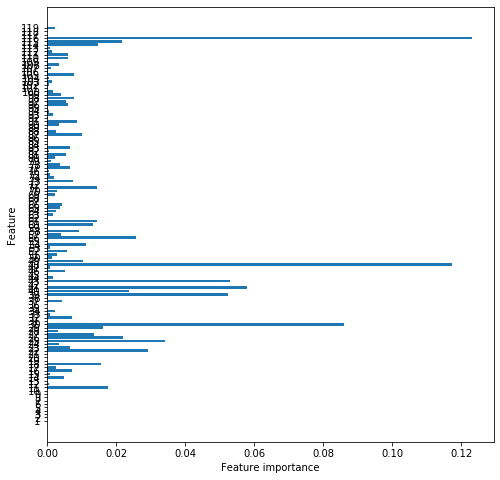

In [15]:
%load_ext autoreload
%autoreload

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import sys
sys.path.append('../../utils')
from utils import feature_selection, fs_driver, feature_snapshot

gt = pd.read_csv('../../../dumps/various_sizes/8K.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

tree = RandomForestClassifier(n_estimators=10,max_depth=10,min_samples_leaf=5,random_state=0) 
tree.fit(data_train, target_train)
n_features = data.shape[1]
plt.rcParams["figure.figsize"] = (8,8)
plt.barh(range(n_features), tree.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), np.arange(1,120)) 
plt.xlabel("Feature importance")
plt.ylabel("Feature")

The output we get is quite different from the one we got with the simple Decision Tree. Here, way more features get credit in the decision process. In the future feature selection process, we should then get more features remaining at each step.

In [2]:
feature_selection('../../../dumps/various_sizes/8K.csv','forest')

Execution            # features  Features selected        Training set acc    Test acc    Time (s)    Fixed cost (s)
-----------------  ------------  ---------------------  ------------------  ----------  ----------  ----------------
Classic                     119  ['f1',...,'f119']                0.992596    0.992439    0.212191          0
K best features              31  ['f11','f18','f23',              0.990548    0.989288    0.190907          0.201888
                                 'f26','f27','f29',
                                 'f30','f32','f37',
                                 'f39','f40','f41',
                                 'f43','f48','f51',
                                 'f54','f56','f57',
                                 'f60','f65','f66',
                                 'f73','f74','f75',
                                 'f92','f105','f114',
                                 'f115','f116','f117',
                                 'f119']
Iterative process        

All cases are quite similar, which is quite unintuitive since we saw that a lot of features had impact and at the end we went from 49 to respectively 31 and 9features.
We can also notice that using the intersection set slightly decreases the test accuracy but logically takes way more time because of the number of iterations required to get the final features set.

As we did with the Decision Trees, let's observe how the performance are impacted when doubling the size of the dataset.

In [3]:
feature_selection('../../../dumps/various_sizes/16K.csv','forest')

Execution            # features  Features selected        Training set acc    Test acc    Time (s)    Fixed cost (s)
-----------------  ------------  ---------------------  ------------------  ----------  ----------  ----------------
Classic                     119  ['f1',...,'f119']                0.988463    0.987843    0.421236          0
K best features              41  ['f18','f24','f26',              0.987839    0.984726    0.367822          0.434399
                                 'f27','f28','f29',
                                 'f30','f35','f37',
                                 'f39','f40','f41',
                                 'f43','f47','f48',
                                 'f51','f53','f54',
                                 'f55','f56','f59',
                                 'f60','f61','f63',
                                 'f64','f70','f71',
                                 'f73','f74','f82',
                                 'f83','f86','f89',
                   

Same conclusion as before : small loss of precision but around 33% of time saved for the first case and same precision but time overhead for the latter.

In [7]:
fs_driver('../../../dumps/various_sizes/16K.csv','forest',[0.005,0.05,0.10])

Threshold : 0.005000
Execution            # features  Features selected        Training set acc    Test acc    Time (s)    Fixed cost (s)
-----------------  ------------  ---------------------  ------------------  ----------  ----------  ----------------
Classic                     119  ['f1',...,'f119']                0.988463    0.987843    0.427607          0
K best features              41  ['f18','f24','f26',              0.987839    0.984726    0.323115          0.372838
                                 'f27','f28','f29',
                                 'f30','f35','f37',
                                 'f39','f40','f41',
                                 'f43','f47','f48',
                                 'f51','f53','f54',
                                 'f55','f56','f59',
                                 'f60','f61','f63',
                                 'f64','f70','f71',
                                 'f73','f74','f82',
                                 'f83','f86','f89'

It's interesting to see that the program crashes for threshold values starting from 0.20 which means that no feature can be intersected.
We can also observe that we could go from 119 to only 4 features while lossing only 0.4% precision but saving once again 1/3 of time. On the other side, reducing the features set to only the 48th feature decreases precision by 5% while saving the same amount of time.

In [16]:
feature_snapshot('../../../dumps/time_analysis/threshold_3/3_20190615_31000.csv','forest')

/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/usr/local/lib/pytho

K best features : 

Accuracy on training set: 0.975
Accuracy on test set: 0.965
------------------------------ 

Iterative process : 

Accuracy on training set: 0.980
Accuracy on test set: 0.980
